# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 634


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units = units = "imperial"
    city_url =  url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fortuna
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | mareeba
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | klaksvik
Processing Record 7 of Set 1 | srednekolymsk
Processing Record 8 of Set 1 | tabuk
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | ponta do sol
Processing Record 12 of Set 1 | nome
Processing Record 13 of Set 1 | san patricio
Processing Record 14 of Set 1 | gemena
Processing Record 15 of Set 1 | kloulklubed
Processing Record 16 of Set 1 | gat
Processing Record 17 of Set 1 | walvis bay
Processing Record 18 of Set 1 | guerrero negro
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | severo-kurilsk
Processing Record 22 of Set 1 | avarua
Processing Record 23 of Set 1 | punt

Processing Record 35 of Set 4 | barrow
Processing Record 36 of Set 4 | atuona
Processing Record 37 of Set 4 | karratha
Processing Record 38 of Set 4 | leningradskiy
Processing Record 39 of Set 4 | mogadishu
Processing Record 40 of Set 4 | bathsheba
Processing Record 41 of Set 4 | karamea
City not found. Skipping...
Processing Record 42 of Set 4 | lompoc
Processing Record 43 of Set 4 | jian
Processing Record 44 of Set 4 | nipawin
Processing Record 45 of Set 4 | longyearbyen
Processing Record 46 of Set 4 | fort nelson
Processing Record 47 of Set 4 | clarksburg
Processing Record 48 of Set 4 | auki
Processing Record 49 of Set 4 | sola
Processing Record 0 of Set 5 | ksenyevka
City not found. Skipping...
Processing Record 1 of Set 5 | ouesso
Processing Record 2 of Set 5 | caravelas
Processing Record 3 of Set 5 | clyde river
Processing Record 4 of Set 5 | pangai
Processing Record 5 of Set 5 | zalantun
Processing Record 6 of Set 5 | namibe
Processing Record 7 of Set 5 | belaya gora
Processing 

Processing Record 26 of Set 8 | avera
Processing Record 27 of Set 8 | labuhan
Processing Record 28 of Set 8 | barreirinhas
Processing Record 29 of Set 8 | crab hill
City not found. Skipping...
Processing Record 30 of Set 8 | ndioum
Processing Record 31 of Set 8 | acarau
Processing Record 32 of Set 8 | rantepao
Processing Record 33 of Set 8 | languyan
Processing Record 34 of Set 8 | kocerin
Processing Record 35 of Set 8 | korla
Processing Record 36 of Set 8 | sayat
Processing Record 37 of Set 8 | izumo
Processing Record 38 of Set 8 | manaure
Processing Record 39 of Set 8 | kokopo
Processing Record 40 of Set 8 | yar-sale
Processing Record 41 of Set 8 | omsukchan
Processing Record 42 of Set 8 | dujuma
City not found. Skipping...
Processing Record 43 of Set 8 | vanavara
Processing Record 44 of Set 8 | marcona
City not found. Skipping...
Processing Record 45 of Set 8 | makat
Processing Record 46 of Set 8 | carballo
Processing Record 47 of Set 8 | asilah
Processing Record 48 of Set 8 | kuchi

Processing Record 14 of Set 12 | paarl
Processing Record 15 of Set 12 | severnyy
Processing Record 16 of Set 12 | chicama
Processing Record 17 of Set 12 | jujuy
City not found. Skipping...
Processing Record 18 of Set 12 | umm lajj
Processing Record 19 of Set 12 | shelburne
Processing Record 20 of Set 12 | davila
Processing Record 21 of Set 12 | campos altos
Processing Record 22 of Set 12 | shingu
Processing Record 23 of Set 12 | kjopsvik
Processing Record 24 of Set 12 | muros
Processing Record 25 of Set 12 | padang
Processing Record 26 of Set 12 | batagay
Processing Record 27 of Set 12 | praya
Processing Record 28 of Set 12 | sokolo
Processing Record 29 of Set 12 | champoton
Processing Record 30 of Set 12 | burns lake
Processing Record 31 of Set 12 | chalon-sur-saone
Processing Record 32 of Set 12 | wangaratta
Processing Record 33 of Set 12 | aktanysh
Processing Record 34 of Set 12 | platanos
Processing Record 35 of Set 12 | eseka
Processing Record 36 of Set 12 | karaul
City not found.

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fortuna,40.5982,-124.1573,54.93,51,0,0.00,US,1675209955
1,rikitea,-23.1203,-134.9692,79.38,73,11,13.29,PF,1675210131
2,kapaa,22.0752,-159.3190,80.58,80,40,9.22,US,1675210131
3,mareeba,-17.0000,145.4333,79.52,93,100,2.91,AU,1675210132
4,lebu,-37.6167,-73.6500,57.70,82,0,21.34,CL,1675210132


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fortuna,40.5982,-124.1573,54.93,51,0,0.00,US,1675209955
1,rikitea,-23.1203,-134.9692,79.38,73,11,13.29,PF,1675210131
2,kapaa,22.0752,-159.3190,80.58,80,40,9.22,US,1675210131
3,mareeba,-17.0000,145.4333,79.52,93,100,2.91,AU,1675210132
4,lebu,-37.6167,-73.6500,57.70,82,0,21.34,CL,1675210132


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

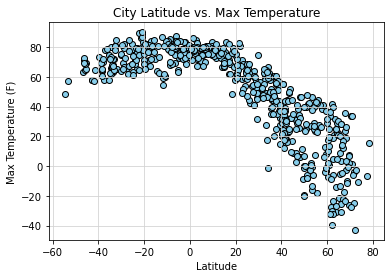

In [10]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

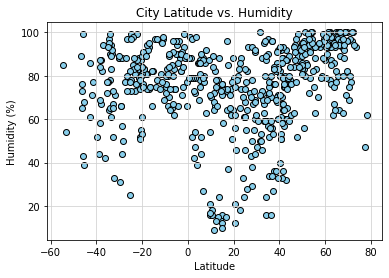

In [11]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

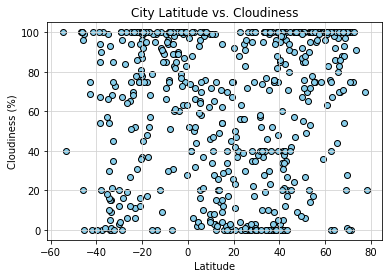

In [12]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

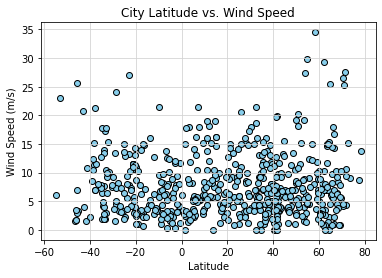

In [13]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
# Save the figure
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fortuna,40.5982,-124.1573,54.93,51,0,0.00,US,1675209955
2,kapaa,22.0752,-159.3190,80.58,80,40,9.22,US,1675210131
5,klaksvik,62.2266,-6.5890,41.83,78,100,29.39,FO,1675210133
6,srednekolymsk,67.4500,153.6833,-17.14,93,88,6.20,RU,1675210133
7,tabuk,17.4189,121.4443,68.59,85,30,4.21,PH,1675210133


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rikitea,-23.1203,-134.9692,79.38,73,11,13.29,PF,1675210131
3,mareeba,-17.0000,145.4333,79.52,93,100,2.91,AU,1675210132
4,lebu,-37.6167,-73.6500,57.70,82,0,21.34,CL,1675210132
8,cape town,-33.9258,18.4232,72.37,78,0,14.00,ZA,1675209957
9,bredasdorp,-34.5322,20.0403,65.70,97,30,4.23,ZA,1675210134


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8598223497012271


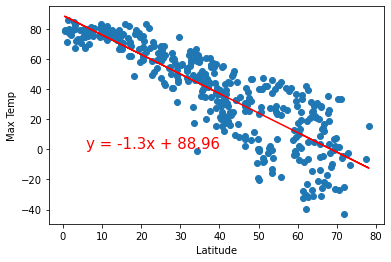

In [17]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
fig1, ax1 = plt.subplots()
plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.43083652467974687


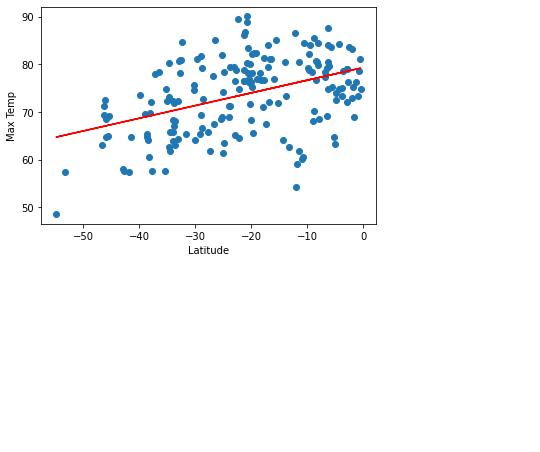

In [18]:
# Linear regression on Southern Hemisphere
xs = southern_hemi_df["Lat"]
ys = southern_hemi_df["Max Temp"]
fig1, ax1 = plt.subplots()
plt.scatter(xs, ys)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs, ys)
regress_values = xs * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(xs ,regress_values ,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4386216702422976


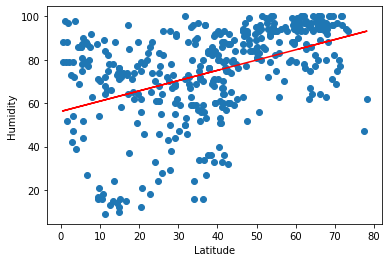

In [19]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
fig1, ax1 = plt.subplots()
plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.26088522862050334


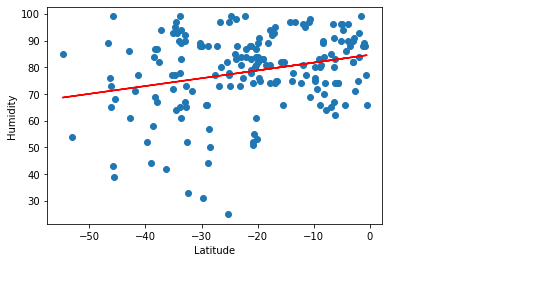

In [20]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
fig1, ax1 = plt.subplots()
plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3637919004694329


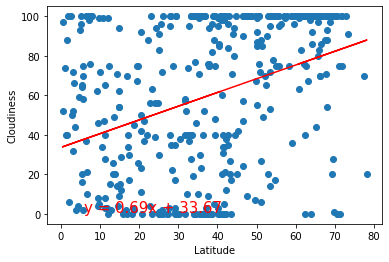

In [21]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
fig1, ax1 = plt.subplots()
plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.28578522464742334


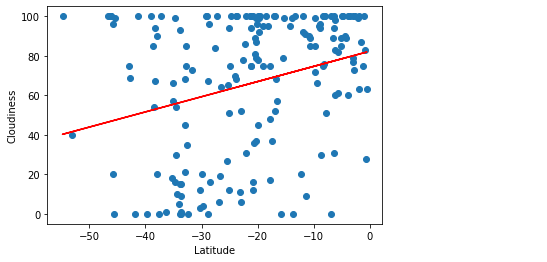

In [22]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
fig1, ax1 = plt.subplots()
plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.033384074247918866


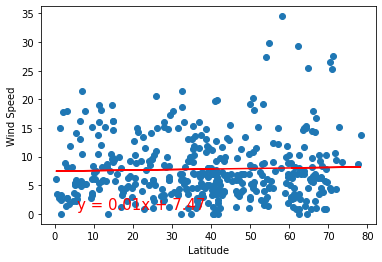

In [23]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
fig1, ax1 = plt.subplots()
plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.20763157888446718


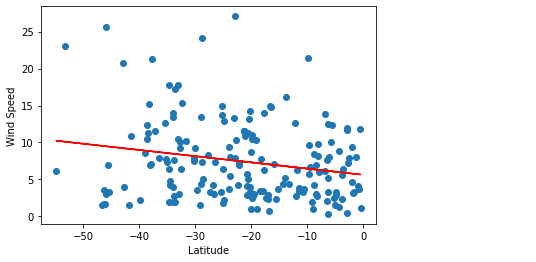

In [24]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
fig1, ax1 = plt.subplots()
plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE